<a href="https://colab.research.google.com/github/shivam-cse/CS-306-Machine-Learning-Work/blob/main/Lab9/Assignment_9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from matplotlib import pyplot as plt
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
from numpy import asarray
import seaborn as sns
import seaborn as sn
import pandas as pd
import numpy as np
import warnings
import random

In [ ]:
from sklearn import datasets
iris = datasets.load_iris()
print(iris.keys())

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])


In [ ]:
X = iris.data
Y = iris.target
# X, Y = shuffle(X, Y)
X = pd.DataFrame(X, columns=iris.feature_names)
print(X)

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                  5.1               3.5                1.4               0.2
1                  4.9               3.0                1.4               0.2
2                  4.7               3.2                1.3               0.2
3                  4.6               3.1                1.5               0.2
4                  5.0               3.6                1.4               0.2
..                 ...               ...                ...               ...
145                6.7               3.0                5.2               2.3
146                6.3               2.5                5.0               1.9
147                6.5               3.0                5.2               2.0
148                6.2               3.4                5.4               2.3
149                5.9               3.0                5.1               1.8

[150 rows x 4 columns]


## **a.	Plot the dataset before training.**

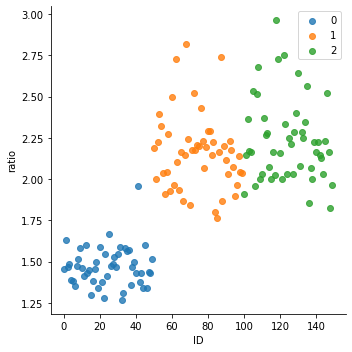

In [ ]:
# https://stackoverflow.com/questions/45862223/use-different-colors-in-scatterplot-for-iris-dataset

dataset = pd.DataFrame(iris.data, columns=iris.feature_names)
dataset['target'] = iris.target
dataset['ID'] = dataset.index
dataset['ratio'] = dataset['sepal length (cm)']/dataset['sepal width (cm)']
sns.lmplot(x="ID", y="ratio", data=dataset, hue="target", fit_reg=False, legend=False)
plt.legend()
plt.show()

## **SLP (one architecture) for multi-class classification**

In [ ]:

def sigmoid(z):
    # Activation function used to map any real value between 0 and 1
    return 1 / (1 + np.exp(-z))


def slp_predict(weights, X):
  X = add_intercept(X)
  y_predicted = sigmoid(np.dot(X, weights.T))
  # y_predicted_cls = threshold(sigmoid(linear_model))
  y_pred = np.where(y_predicted >= 0.5 , 1, 0)
  return np.array(y_pred)

def cost_mse(weights, X, Y):
  X = add_intercept(X)
  total_samples = X.shape[0]
  jw = 0
  for j in range(total_samples): #index from total samples
          sample_x = X[j]
          sample_y = Y[j]
          y_predicted = sigmoid(np.dot(sample_x, weights.T))
          # print(sample_y, y_predicted)
          jw = jw + (np.sum((sample_y - y_predicted) ** 2))/2
  jw = (jw)/(2*total_samples)
  return jw
  

def accuracy(y_true, y_pred):
    ans = 0
    for i in range(y_true.shape[0]):
      y1 = y_true[i]
      y2 = y_pred[i]
      count = np.sum(y1 == y2)
      if count == 3:
        ans = ans + 1
  
    ans = ans/len(y_true)
    return ans   


def add_intercept(x):
  intercept = np.ones((x.shape[0], 1))
  return np.concatenate((intercept, x), axis=1)

def SLP(X_train, Y_train, epoch, learning_rate):
    X_train = add_intercept(X_train)
    number_of_features = X_train.shape[1]
    number_of_class = Y_train.shape[1]
    # numpy array with 1 row and columns equal to number of features. In
    # weights = np.ones(shape=(number_of_features)) 
    weights = np.empty(shape=(number_of_class, number_of_features))
    weights.fill(0.1)
    cost_list = list()
    epoch_list = list()
    mse = 0
    # weights = np.array([0.1, 0.1, 0.1])
    total_samples = X_train.shape[0]
    for i in range(epoch + 1): 
        jw = 0   
        for j in range(total_samples): # random index from total samples
          sample_x = X_train[j]
          sample_y = Y_train[j]
         
          y_predicted = sigmoid(np.dot(sample_x, weights.T))
          # print(sample_y, y_predicted)
          jw = jw + (np.sum((sample_y - y_predicted) ** 2))/2
          # print(jw)
          w_grad = ((np.dot(sample_x[:, None], (sample_y - y_predicted)[None, : ]))*y_predicted*(1-y_predicted)).T          
          weights = weights + learning_rate * w_grad
        jw = (jw)/(2*total_samples)
        mse = jw
        if i == 100: # at every 100th iteration record the cost and epoch value
         cost_list.append(jw)
         epoch_list.append(i)
        
    return weights, cost_list, epoch_list, mse




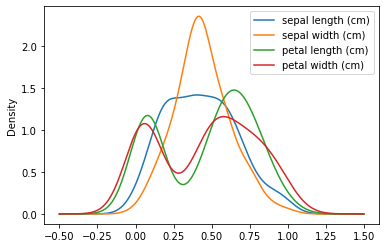

In [ ]:
from sklearn.preprocessing import MinMaxScaler
minmax = MinMaxScaler()
dataset_new = minmax.fit_transform(X)
X = pd.DataFrame(dataset_new, columns=iris.feature_names)
X.plot.kde()
X = X.values

## **One Hot Encoding**

In [ ]:
# define one hot encoding
encoder = OneHotEncoder(sparse=False)
# transform data
onehot = encoder.fit_transform(np.reshape(Y, (-1, 1)))
print(onehot)
# temp = encoder.inverse_transform(onehot)
# print(temp)

In [ ]:
train_frac = 60/100  #60%   left ->: 100-60 = 40%
valid_frac = 20/40 #(100/70)*10
test_frac = 20/40 #(100/70)*60
print("total : ", X.shape)
x_train, x_rem, y_train, y_rem = train_test_split(X, onehot, train_size=train_frac)
x_valid, x_test, y_valid,  y_test = train_test_split(x_rem, y_rem,  test_size=test_frac)
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)
print(x_valid.shape, y_valid.shape)

total :  (150, 4)
(90, 4) (90, 3)
(30, 4) (30, 3)
(30, 4) (30, 3)


## **b.	Check overfitting issue**

In [ ]:
# rho = [0.00001, 0.00001, 0.00007, 0.000008, 0.00009]
alpha = [0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6]
epochs = [10, 50, 100, 150, 170, 280, 300]

validation_accuracy = []
train_accuracy = []
test_accuracy = []
train_mse = []
validation_mse = []
test_mse = []
for a, e in zip(alpha, epochs):
  weights, cost_list, epoch_list, mse = SLP(x_train, y_train, e, a)
  # print(weights)
  print("Alph = ", a, "epoch = ", e)
  y_pred_train = slp_predict(weights, x_train)
  y_pred_valid = slp_predict(weights, x_valid)
  y_pred_test = slp_predict(weights, x_test)
  accuracy_train = accuracy_score(y_train, y_pred_train)
  accuracy_valid = accuracy_score(y_valid, y_pred_valid)
  accuracy_test = accuracy_score(y_test, y_pred_test)
  print("Train Accuracy : ", accuracy_train)
  print("Validation Accuracy : ", accuracy_valid)
  print("Test Accuracy : ", accuracy_test)
  validation_accuracy.append(accuracy_valid)
  train_accuracy.append(accuracy_train)
  test_accuracy.append(accuracy_test)
  mse_ = cost_mse(weights, x_valid, y_valid)
  mse_t = cost_mse(weights, x_test, y_test)
  train_mse.append(mse)
  validation_mse.append(mse_)
  test_mse.append(mse_t)
  print("-"*50)
  # print(cost_list)
  # print(epoch_list)


Alph =  0.6 epoch =  10
Train Accuracy :  0.7
Validation Accuracy :  0.6333333333333333
Test Accuracy :  0.7333333333333333
--------------------------------------------------
Alph =  0.6 epoch =  50
Train Accuracy :  0.7444444444444445
Validation Accuracy :  0.7
Test Accuracy :  0.7
--------------------------------------------------
Alph =  0.6 epoch =  100
Train Accuracy :  0.7444444444444445
Validation Accuracy :  0.7
Test Accuracy :  0.7
--------------------------------------------------
Alph =  0.6 epoch =  150
Train Accuracy :  0.7555555555555555
Validation Accuracy :  0.7
Test Accuracy :  0.7
--------------------------------------------------
Alph =  0.6 epoch =  170
Train Accuracy :  0.7444444444444445
Validation Accuracy :  0.7
Test Accuracy :  0.7
--------------------------------------------------
Alph =  0.6 epoch =  280
Train Accuracy :  0.7333333333333333
Validation Accuracy :  0.6666666666666666
Test Accuracy :  0.7
--------------------------------------------------
Alph =

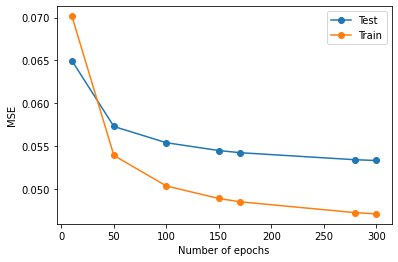

In [ ]:
plt.plot(epochs, test_mse, '-o', label='Test')
plt.plot(epochs, train_mse, '-o', label='Train')
plt.xlabel("Number of epochs")
plt.ylabel("MSE")
plt.legend()
plt.show()
# pyplot.show()


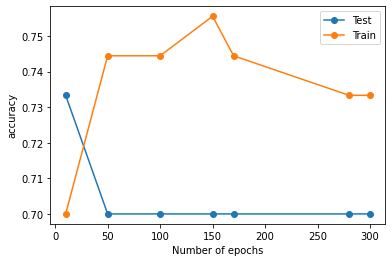

In [ ]:
plt.plot(epochs, test_accuracy, '-o', label='Test')
plt.plot(epochs, train_accuracy, '-o', label='Train')
plt.xlabel("Number of epochs")
plt.ylabel("accuracy")
plt.legend()
plt.show()


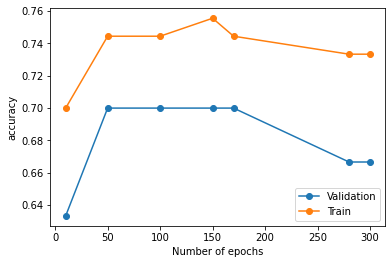

In [ ]:
plt.plot(epochs, validation_accuracy, '-o', label='Validation')
plt.plot(epochs, train_accuracy, '-o', label='Train')
plt.xlabel("Number of epochs")
plt.ylabel("accuracy")
plt.legend()
plt.show()


### **c.	Finally report class-wise precision, recall, accuracy and overall accuracy considering 5-fold cross validation.**

In [ ]:
def kfold_cv(X, Y, fs = 5, epoch = 100, alpha = 0.5):
  X, Y = shuffle(X, Y)
  fold_size = fs
  strtfdKFold = StratifiedKFold(n_splits=fold_size)
  kfold = strtfdKFold.split(X, Y)
  scores = []
  e = epoch
  a = alpha
  total_cost = 0
  for k, (train, test) in enumerate(kfold):
    print("-"*20, "KFold - ",k +1,  "-"*20)
    x_ftrain, y_ftrain = X[train], Y[train]
    x_ftest, y_ftest = X[test], Y[test]
    encoder = OneHotEncoder(sparse=False)
    # transform data
    y_ftrain = encoder.fit_transform(np.reshape(y_ftrain, (-1, 1)))
    y_ftest =  encoder.fit_transform(np.reshape(y_ftest, (-1, 1)))
    weights, cost_list, epochs_list, mse = SLP(x_ftrain, y_ftrain, e, a)
    test_mse = cost_mse(weights, x_ftest,  y_ftest)
    print("Test cost[Error] :", test_mse)
    total_cost += test_mse
    y_pred_test = slp_predict(weights, x_ftest)
    y_pred_test_inverse = encoder.inverse_transform(y_pred_test)
    y_actual_test_inverse = encoder.inverse_transform(y_ftest)
    print('Confusion Matrix : \n' + str(confusion_matrix(y_actual_test_inverse, y_pred_test_inverse)))
    # print('Confusion Matrix For Test Data set : \n')
    # cm = confusion_matrix(y_actual_test_inverse, y_pred_test_inverse)
    # plt.figure(figsize = (10,7))
    # # cmap= "Greens_r"
    # # cmap= "OrRd_r"
    # # cmap= "OrRd"
    # sn.heatmap(cm, annot=True,cmap="Greens_r")
    print("Classification Report for 3-classes: ")
    print(classification_report(y_ftest, y_pred_test))
    accuracy_test = accuracy_score(y_ftest, y_pred_test)
    print("Overall Test Accuracy: ", accuracy_test)
  print("-----------------Done Kfold----------------")    
  print("Total Cost [Errors]", total_cost/fold_size)    


In [ ]:
kfold_cv(X, Y, 5, 150, 0.6)

-------------------- KFold -  1 --------------------
Test cost[Error] : 0.0491949675680886
Confusion Matrix : 
[[10  0  0]
 [ 4  6  0]
 [ 0  2  8]]
Classification Report for 3-classes: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.75      0.60      0.67        10
           2       0.91      1.00      0.95        10

   micro avg       0.90      0.87      0.88        30
   macro avg       0.89      0.87      0.87        30
weighted avg       0.89      0.87      0.87        30
 samples avg       0.82      0.87      0.83        30

Overall Test Accuracy:  0.7666666666666667
-------------------- KFold -  2 --------------------


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Test cost[Error] : 0.05732596198027069
Confusion Matrix : 
[[10  0  0]
 [ 5  4  1]
 [ 0  5  5]]
Classification Report for 3-classes: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.44      0.40      0.42        10
           2       0.91      1.00      0.95        10

   micro avg       0.80      0.80      0.80        30
   macro avg       0.78      0.80      0.79        30
weighted avg       0.78      0.80      0.79        30
 samples avg       0.72      0.80      0.74        30

Overall Test Accuracy:  0.6333333333333333
-------------------- KFold -  3 --------------------


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Test cost[Error] : 0.0473208862449608
Confusion Matrix : 
[[10  0  0]
 [ 4  6  0]
 [ 0  2  8]]
Classification Report for 3-classes: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.75      0.60      0.67        10
           2       1.00      0.90      0.95        10

   micro avg       0.93      0.83      0.88        30
   macro avg       0.92      0.83      0.87        30
weighted avg       0.92      0.83      0.87        30
 samples avg       0.82      0.83      0.82        30

Overall Test Accuracy:  0.8
-------------------- KFold -  4 --------------------


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Test cost[Error] : 0.043341802540784784
Confusion Matrix : 
[[10  0  0]
 [ 3  7  0]
 [ 0  2  8]]
Classification Report for 3-classes: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.70      0.70      0.70        10
           2       0.91      1.00      0.95        10

   micro avg       0.87      0.90      0.89        30
   macro avg       0.87      0.90      0.88        30
weighted avg       0.87      0.90      0.88        30
 samples avg       0.83      0.90      0.86        30

Overall Test Accuracy:  0.7666666666666667
-------------------- KFold -  5 --------------------


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Test cost[Error] : 0.05481142444043618
Confusion Matrix : 
[[10  0  0]
 [ 3  7  0]
 [ 0  5  5]]
Classification Report for 3-classes: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.58      0.70      0.64        10
           2       1.00      1.00      1.00        10

   micro avg       0.84      0.90      0.87        30
   macro avg       0.86      0.90      0.88        30
weighted avg       0.86      0.90      0.88        30
 samples avg       0.82      0.90      0.84        30

Overall Test Accuracy:  0.7333333333333333
-----------------Done Kfold----------------
Total Cost [Errors] 0.05039900855490821


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
